In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"C:\Users\pc cam\Downloads\archive (6)\train.csv")

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Missing Values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
data.drop("Postal Code", axis=1,inplace=True)

In [7]:
data.drop("Row ID",axis=1,inplace=True)

In [10]:
data["Order Date"] = pd.to_datetime(data["Order Date"],format='mixed')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   object        
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Region         9800 non-null   object        
 11  Product ID     9800 non-null   object        
 12  Category       9800 non-null   object        
 13  Sub-Category   9800 non-null   object        
 14  Product Name   9800 non-null   object        
 15  Sales          9800 n

In [12]:
data["Ship Date"] = pd.to_datetime(data["Ship Date"],format='mixed')

In [14]:
data["Ship Mode"].value_counts()

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

In [15]:
data["Segment"].value_counts()

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

In [16]:
data["Country"].value_counts()

Country
United States    9800
Name: count, dtype: int64

In [23]:
data[data.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
3406,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [18]:
data.drop_duplicates(inplace=True)

### DATA Exploratory

In [32]:
customer_segment= data["Segment"].value_counts().reset_index()
customer_segment

,Segment,count
0,Consumer,5101
1,Corporate,2953
2,Home Office,1745


In [33]:
customer_segment = customer_segment.rename(columns={"Segment" : "Customer type" , "count" : "count"})

In [34]:
customer_segment

,Customer type,count
0,Consumer,5101
1,Corporate,2953
2,Home Office,1745


### Data Viualisation

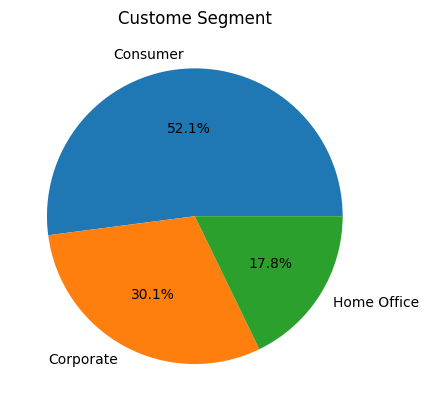

In [38]:
plt.pie(customer_segment["count"],labels=customer_segment["Customer type"],autopct="%1.1f%%")
plt.title("Customer Segment")
plt.show()

In [41]:
sales_per_segment = data.groupby("Segment")["Sales"].sum().reset_index()
sales_per_segment

,Segment,Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.247008e+05


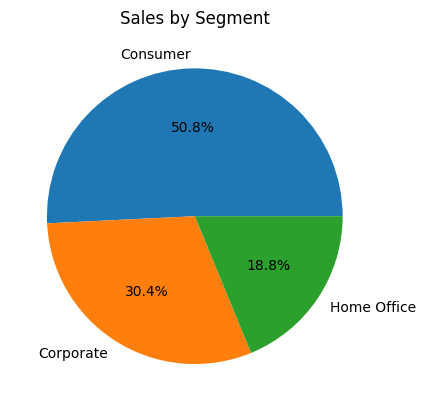

In [42]:
plt.pie(sales_per_segment["Sales"],labels=sales_per_segment["Segment"],autopct="%1.1f%%")
plt.title("Sales by Segment")
plt.show()

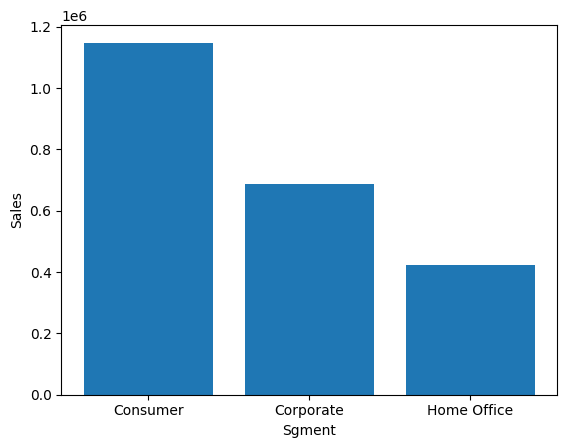

In [46]:
plt.bar(sales_per_segment["Segment"],sales_per_segment["Sales"])
plt.xlabel("Sgment")
plt.ylabel("Sales")
plt.show()

## TOP 10 Customers by total order

In [58]:
customer_loyalty = data.groupby(["Segment","Customer Name"])["Order ID"].count().reset_index()
customer_loyalty=customer_loyalty.sort_values(by="Order ID",ascending=False)
customer_loyalty.reset_index(drop=True,inplace=True)
customer_loyalty.head(10)

,Segment,Customer Name,Order ID
0,Consumer,William Brown,35
1,Home Office,Paul Prost,34
2,Home Office,Matt Abelman,34
3,Consumer,John Lee,33
4,Consumer,Seth Vernon,32
5,Corporate,Jonathan Doherty,32
6,Consumer,Chloris Kastensmidt,32
7,Consumer,Zuschuss Carroll,31
8,Consumer,Arthur Prichep,31
9,Consumer,Emily Phan,31


In [61]:
customer_loyalty.rename(columns={"Order ID":"Total orders"},inplace=True)
customer_loyalty.head(10)

,Segment,Customer Name,Total orders
0,Consumer,William Brown,35
1,Home Office,Paul Prost,34
2,Home Office,Matt Abelman,34
3,Consumer,John Lee,33
4,Consumer,Seth Vernon,32
5,Corporate,Jonathan Doherty,32
6,Consumer,Chloris Kastensmidt,32
7,Consumer,Zuschuss Carroll,31
8,Consumer,Arthur Prichep,31
9,Consumer,Emily Phan,31


In [62]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

## TOP 10 Customers by sales

In [71]:
customer_sales = data.groupby(["Customer ID","Customer Name"])["Sales"].sum().reset_index()
customer_sales.sort_values(by="Sales",ascending=False,inplace=True)
customer_sales.reset_index(drop=True,inplace=True)
customer_sales.head(10)

,Customer ID,Customer Name,Sales
0,SM-20320,Sean Miller,25043.050
1,TC-20980,Tamara Chand,19052.218
2,RB-19360,Raymond Buch,15117.339
3,TA-21385,Tom Ashbrook,14595.620
4,AB-10105,Adrian Barton,14473.571
5,KL-16645,Ken Lonsdale,14175.229
6,SC-20095,Sanjit Chand,14142.334
7,HL-15040,Hunter Lopez,12873.298
8,SE-20110,Sanjit Engle,12209.438
9,CC-12370,Christopher Conant,12129.072


In [72]:
data.head(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [73]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

In [78]:
shipping_mode = data["Ship Mode"].value_counts().reset_index()

### Shipping Mode

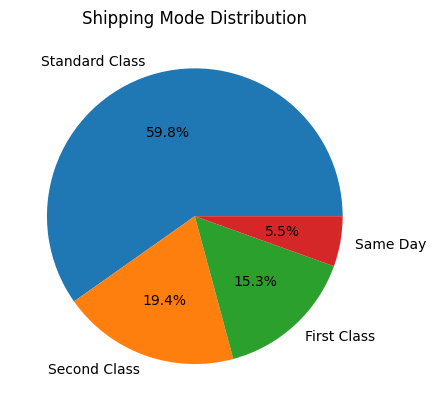

In [81]:
plt.pie(shipping_mode["count"],labels=shipping_mode["Ship Mode"],autopct="%1.1f%%")
plt.title("Shipping Mode Distribution")
plt.show()

In [82]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [85]:
regional_sales = data.groupby("Region")["Sales"].sum().reset_index()
regional_sales

,Region,Sales
0,Central,492646.9132
1,East,669237.3540
2,South,389151.4590
3,West,710219.6845


## Geographical Analysis

# Salesby region 

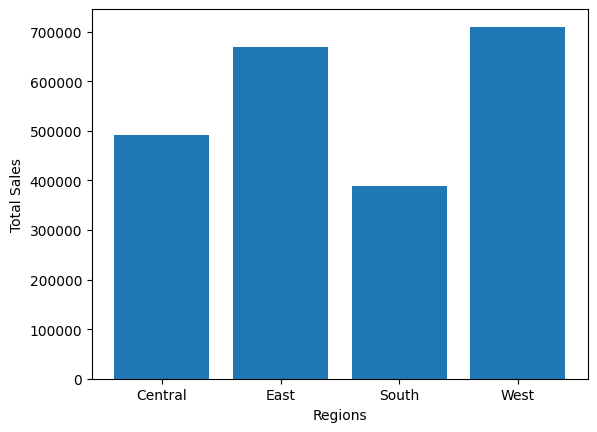

In [86]:
plt.bar(regional_sales["Region"],regional_sales["Sales"])
plt.xlabel("Regions")
plt.ylabel("Total Sales")
plt.show()

## TOP 10 Cities by Sales 

In [94]:
city_sales = data.groupby("City")["Sales"].sum().reset_index()
city_sales.sort_values(by="Sales",ascending=False,inplace=True)
city_sales.reset_index(drop=True,inplace=True)
city_sales.head(10)

,City,Sales
0,New York City,252462.5470
1,Los Angeles,173420.1810
2,Seattle,116106.3220
3,San Francisco,109041.1200
4,Philadelphia,108841.7490
5,Houston,63956.1428
6,Chicago,47820.1330
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Detroit,42446.9440


## TOP 10 CITIES BY TOTAL ORDERS

In [101]:
cities_freq = data.groupby("City")["Order ID"].count().reset_index()
cities_freq.sort_values(by="Order ID",ascending=False,inplace=True)
cities_freq.reset_index(drop=True,inplace=True)
cities_freq.head(10)

,City,Order ID
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426
5,Houston,374
6,Chicago,308
7,Columbus,220
8,San Diego,170
9,Springfield,161


## TOP 10 STATES BY TOTAL ORDERS

In [115]:
state = data["State"].value_counts().reset_index()
state = state.rename(columns={"Order ID":"Customers"})
state.head(10)

,State,count
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504
5,Illinois,483
6,Ohio,453
7,Florida,373
8,Michigan,253
9,North Carolina,247


## Category frequency 

In [121]:
Category = data.Category.value_counts().reset_index()
Category

,Category,count
0,Office Supplies,5909
1,Furniture,2077
2,Technology,1813


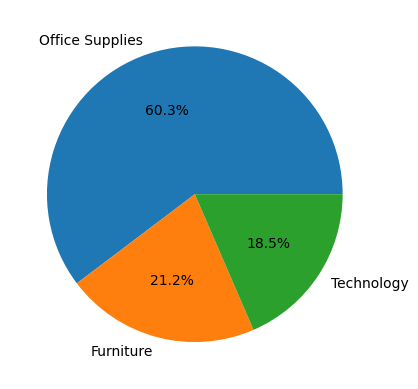

In [123]:
plt.pie(Category["count"],labels=Category["Category"],autopct="%1.1f%%")
plt.show()

## Sales by category

In [129]:
Category_sales = data.groupby("Category")["Sales"].sum().reset_index()
Category_sales.sort_values(by="Sales",ascending=False, inplace=True)

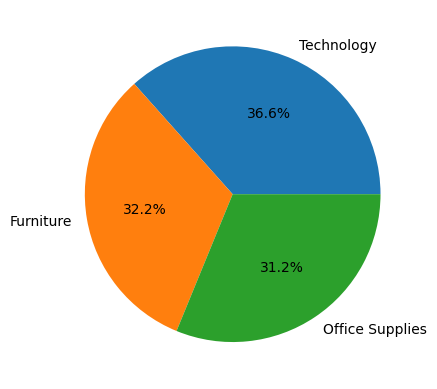

In [130]:
plt.pie(Category_sales["Sales"],labels=Category_sales["Category"],autopct="%1.1f%%")
plt.show()

###  Products by sales

In [131]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

In [143]:
Sub_Category = data.groupby("Sub-Category")["Sales"].sum().reset_index()
Sub_Category.sort_values(by="Sales",ascending=True , inplace=True)
Sub_Category.reset_index(drop=True,inplace=True)
Sub_Category

,Sub-Category,Sales
0,Fasteners,3001.9600
1,Labels,12347.7260
2,Envelopes,16128.0460
3,Art,26705.4100
4,Supplies,46420.3080
5,Paper,76828.3040
6,Furnishings,89212.0180
7,Appliances,104618.4030
8,Bookcases,113813.1987
9,Copiers,146248.0940


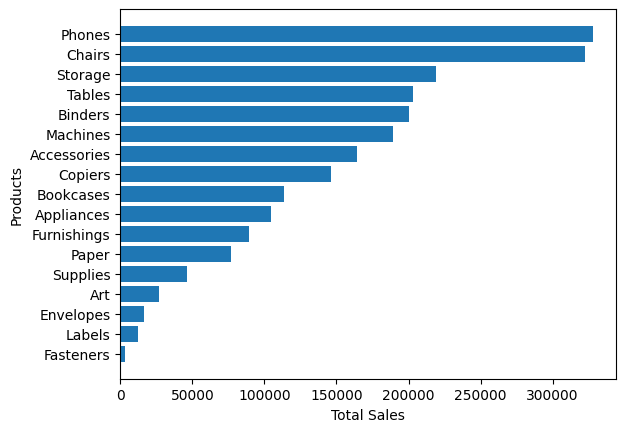

In [144]:
plt.barh(Sub_Category["Sub-Category"],Sub_Category["Sales"])
plt.ylabel("Products")
plt.xlabel("Total Sales")
plt.show()

In [145]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

# Sales Trends 

In [146]:
data["year"] = data["Order Date"].dt.year

In [147]:
year_date = data.groupby("year")["Sales"].sum().reset_index()
year_date

,year,Sales
0,2015,479574.8361
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


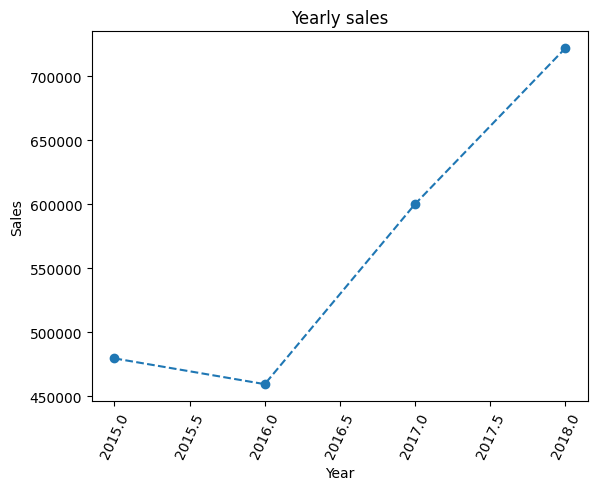

In [156]:
plt.plot(year_date["year"],year_date["Sales"],marker="o" , linestyle="--")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Yearly sales")
plt.xticks(rotation=65)
plt.show()

In [158]:
nw_data = data[data["year"]==2018]

In [170]:
quartly_sales = nw_data.resample("Q",on="Order Date")["Sales"].sum()
quartly_sales = quartly_sales.reset_index()
quartly_sales

,Order Date,Sales
0,2018-03-31,183444.5482
1,2018-06-30,125644.5095
2,2018-09-30,202504.9235
3,2018-12-31,210458.0380


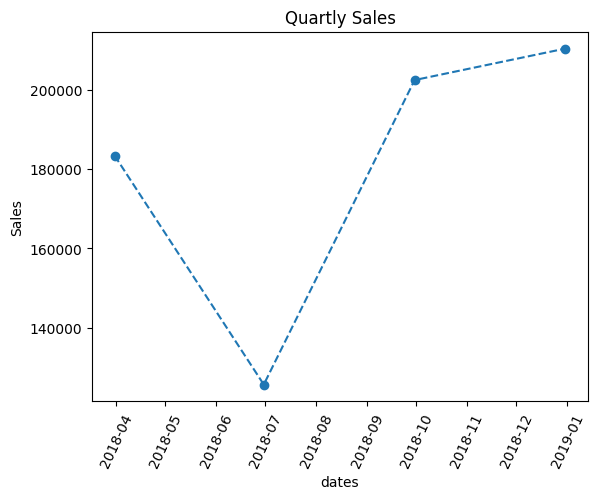

In [172]:
plt.plot(quartly_sales["Order Date"],quartly_sales["Sales"],marker="o",linestyle="--")
plt.xlabel("dates")
plt.ylabel("Sales")
plt.title("Quartly Sales")
plt.xticks(rotation=65)
plt.show()

In [174]:
data["month"] = data["Order Date"].dt.month

In [177]:
nw_data = data[data["year"]==2018]

In [187]:
monthly_sales = nw_data.groupby("month")["Sales"].sum()
monthly_sales=monthly_sales.reset_index()

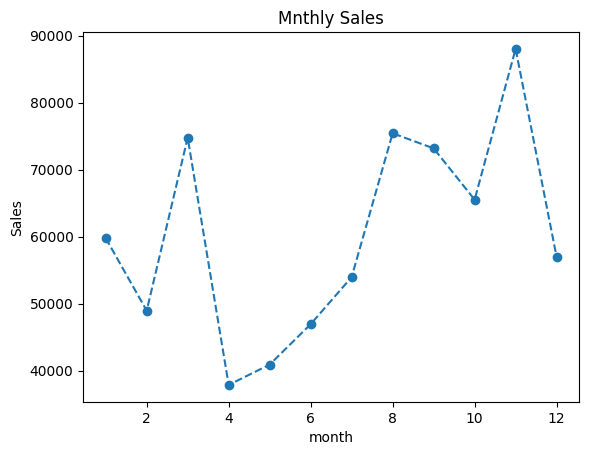

In [188]:
plt.plot(monthly_sales["month"],monthly_sales["Sales"],marker="o",linestyle="--")
plt.xlabel("month")
plt.ylabel("Sales")
plt.title("Mnthly Sales")
plt.show()